In [1]:
import os
import torch
import matplotlib.pyplot as plt

# Functions

In [2]:
class ScoreKeeper:
    def __init__(self, base_path, concept, node, seed):
        self.base_path = base_path
        self.concept = concept
        self.node = node
        self.seed = seed
        self.final_path = os.path.join(self.base_path, self.concept, self.node, f"{self.node}_seed{self.seed}/consistency_test")
        self.consistency_score = torch.load(os.path.join(self.final_path, f"seed{self.seed}_scores.bin"))
        self.steps = sorted(list(self.consistency_score.keys()))
        self.final_score = [self.consistency_score[step]['final'] for step in self.steps]
        self.left_score = [self.consistency_score[step]['s_l'] for step in self.steps]
        self.right_score = [self.consistency_score[step]['s_r'] for step in self.steps]
        self.in_score = [l + r for l, r in zip(self.left_score, self.right_score)]
        self.cross_score = [self.consistency_score[step]['s_lr'] for step in self.steps]
        self.mapping = {
            'final': self.final_score,
            'left': self.left_score,
            'right': self.right_score,
            'in': self.in_score,
            'cross': self.cross_score
        }

    def plot(self, types=['final'], size=(6.4, 4.8), title='Consistency Score'):
        plt.figure(figsize=size)
        plt.title(title)
        for type in types:
            plt.plot(self.steps, self.mapping[type], label=type)
        plt.xlabel('Step')
        plt.ylabel('Consistency Score')
        plt.legend()
        plt.show()

    def __str__(self):
        return f"""
Concept: {self.concept}
Node: {self.node}
Seed: {self.seed}
Consistency Score (Final): {self.final_score}
"""

In [3]:
def plot_one_exp(score_keeper_dict, types=['final'], size=(6.4, 4.8), title='Consistency Score Comparison'):
    score_keeper_list = list(score_keeper_dict.values())
    plt.figure(figsize=size)
    plt.title(title)
    for score_keeper in score_keeper_list:
        for type in types:
            plt.plot(score_keeper.steps, score_keeper.mapping[type], label=f"{score_keeper.concept}/{score_keeper.node}/seed_{score_keeper.seed}/{type}")
    plt.xlabel('Step')
    plt.ylabel('Consistency Score')
    plt.legend()
    plt.show()


def average_over_one_exp(score_keeper_dict, type):
    score_keeper_list = list(score_keeper_dict.values())
    steps = score_keeper_list[0].steps
    average = [0 for _ in range(len(steps))]
    for score_keeper in score_keeper_list:
        for i, step in enumerate(steps):
            average[i] += score_keeper.mapping[type][i]
    average = [score / len(score_keeper_list) for score in average]
    return average 


def plot_exp_comparison(list_of_score_keeper_dict, exp_name, types=['final'], size=(6.4, 4.8), title='Consistency Score Comparison'):
    plt.figure(figsize=size)
    plt.title(title)
    for type in types:
        for i, score_keeper_dict in enumerate(list_of_score_keeper_dict):
            average = average_over_one_exp(score_keeper_dict, type)
            plt.plot(score_keeper_dict[list(score_keeper_dict.keys())[0]].steps, average, label=f"{exp_name[i]}/{type}")
    plt.xlabel('Step')
    plt.ylabel('Consistency Score')
    plt.legend()
    plt.show()

def load_score_keepers(path, node, seed):
    score_keeper_dict = {}
    for concept in os.listdir(path):
        score_keeper = ScoreKeeper(path, concept, node, seed)
        score_keeper_dict[concept] = score_keeper
    return score_keeper_dict

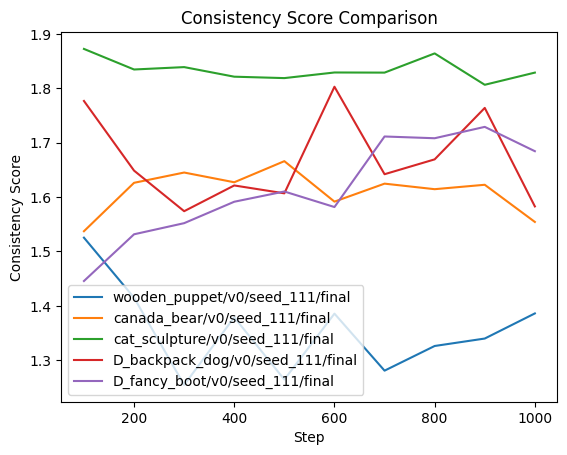

In [24]:
exp_origin_path = "experiments/20241107_cl_v1/outputs"
exp_origin_node = "v0"
exp_origin_seed = 111

exp_origin_sk_list = load_score_keepers(exp_origin_path, exp_origin_node, exp_origin_seed)
plot_one_exp(exp_origin_sk_list, types=['final'])

# Plotting

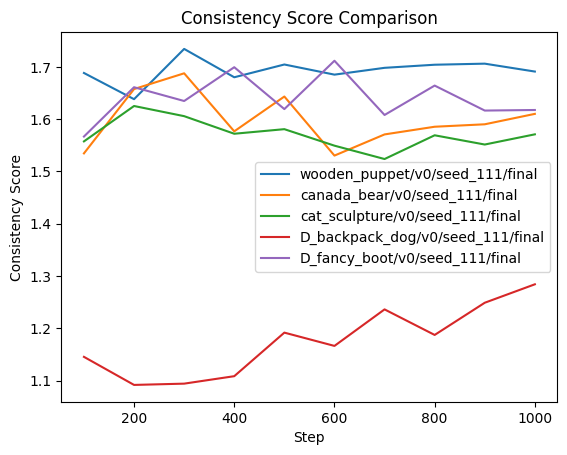

In [36]:
exp_one_emb_path = "experiments/20241222_conceptor_one_emb"
exp_one_emb_node = "v0"
exp_one_emb_seed = 111

exp_one_emb_sk_list = load_score_keepers(exp_one_emb_path, exp_one_emb_node, exp_one_emb_seed)
plot_one_exp(exp_one_emb_sk_list, types=['final'])

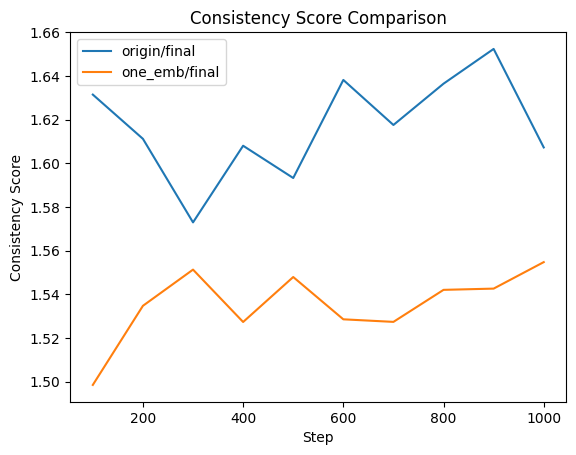

In [37]:
plot_exp_comparison([exp_origin_sk_list, exp_one_emb_sk_list], ['origin', 'one_emb'], types=['final'])

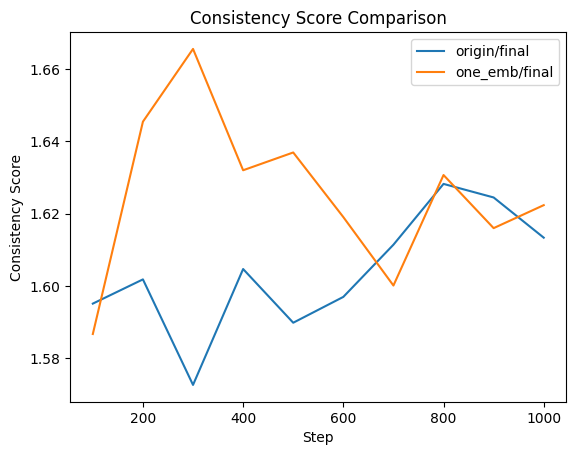

In [38]:
del_cpt = "D_backpack_dog"
del exp_origin_sk_list[del_cpt]
del exp_one_emb_sk_list[del_cpt]
plot_exp_comparison([exp_origin_sk_list, exp_one_emb_sk_list], ['origin', 'one_emb'], types=['final'])

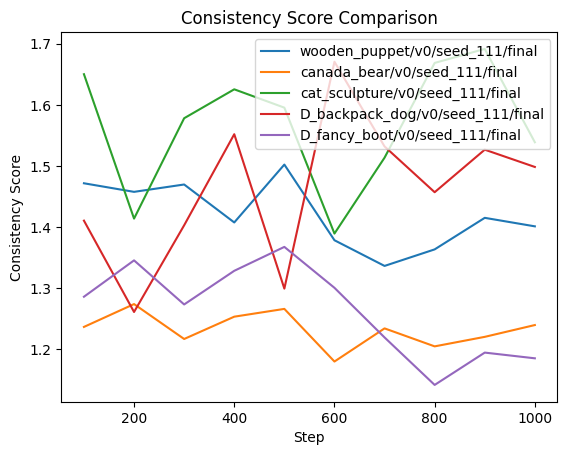

In [ ]:
exp_init_path = "experiments/20241131_conceptor_init"
exp_init_node = "v0"
exp_init_seed = 111

exp_init_sk_list = load_score_keepers(exp_init_path, exp_init_node, exp_init_seed)
plot_one_exp(exp_init_sk_list, types=['final'])

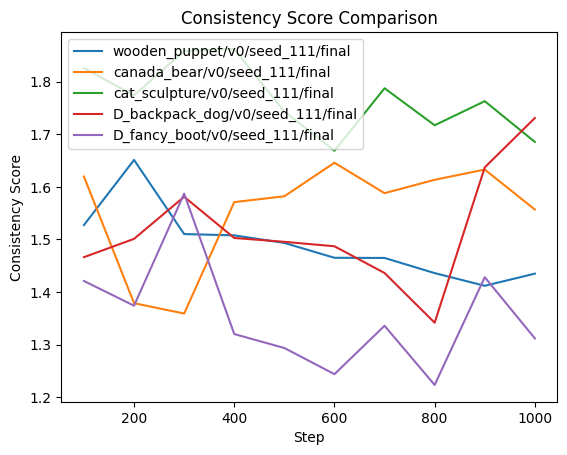

In [ ]:
exp_init_res_path = "experiments/20241216_conceptor_init_res"
exp_init_res_node = "v0"
exp_init_res_seed = 111

exp_init_res_sk_list = load_score_keepers(exp_init_res_path, exp_init_res_node, exp_init_res_seed)
plot_one_exp(exp_init_res_sk_list, types=['final'])

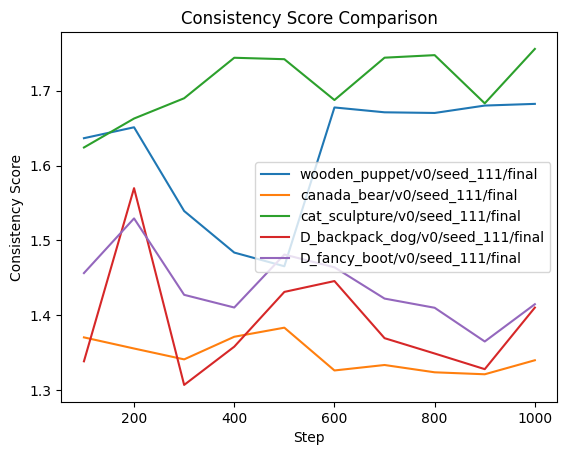

In [ ]:
exp_init_res_fixed_path = "experiments/20241217_conceptor_init_res_fixed"
exp_init_res_fixed_node = "v0"
exp_init_res_fixed_seed = 111

exp_init_res_fixed_sk_list = load_score_keepers(exp_init_res_fixed_path, exp_init_res_fixed_node, exp_init_res_fixed_seed)
plot_one_exp(exp_init_res_fixed_sk_list, types=['final'])

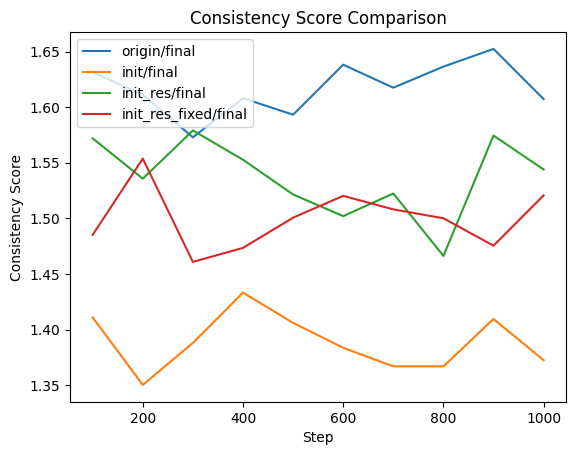

In [15]:
plot_exp_comparison([exp_origin_sk_list, exp_init_sk_list, exp_init_res_sk_list, exp_init_res_fixed_sk_list],
                    ['origin', 'init', 'init_res', 'init_res_fixed'],
                    types=['final'])